# Supervised Learning Capstone Project - Tree Methods Focus 


The goal is to Create a Model to Predict Whether or Not a Customer will Churn .

----
----


## Part 0: Imports and Read in the Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

checked datatypes and non-null values in the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Based on the statistical summary of the numeric columns with .describe() , I noticed that many columns are categorical, meaning I will eventually need to convert them to dummy variables.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Part 2:  Exploratory Data Analysis

### General Feature Exploration

Confirmed that there are no NaN cells by displaying NaN values per feature column.

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Displayed the balance of the class labels (Churn) with a Count Plot.

<AxesSubplot:xlabel='Churn', ylabel='count'>

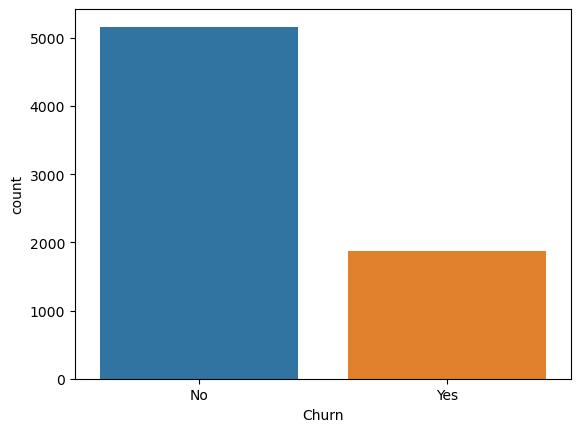

In [11]:
sns.countplot(data=df,x='Churn', hue = 'Churn')

Displayed the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

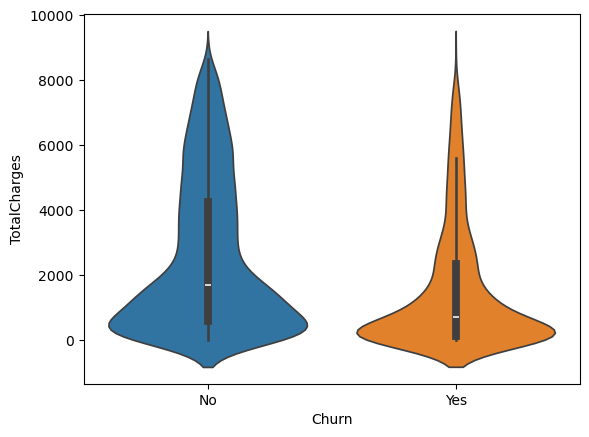

In [12]:
sns.violinplot(data=df,x='Churn',y='TotalCharges', hue="Churn")

Below is a boxplot showing the distribution of TotalCharges per Contract type

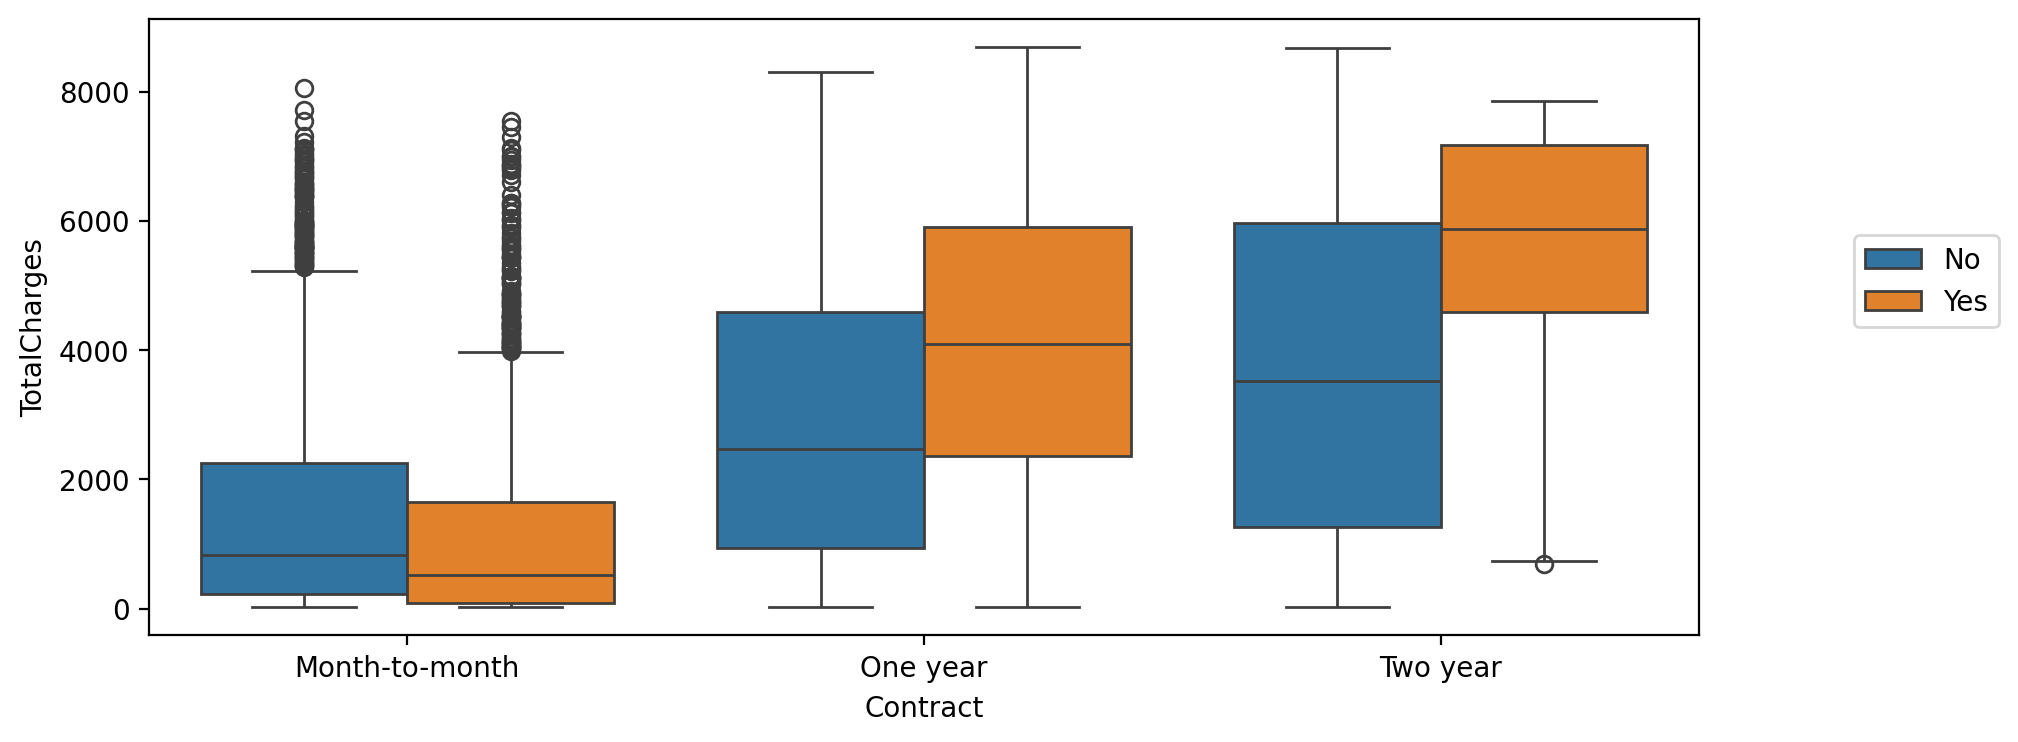

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

Below is a bar plot showing the correlation of the following features to the class label. 

I converted the categorical features into dummy variables to calculate correlation for numeric features.

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [14]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [16]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

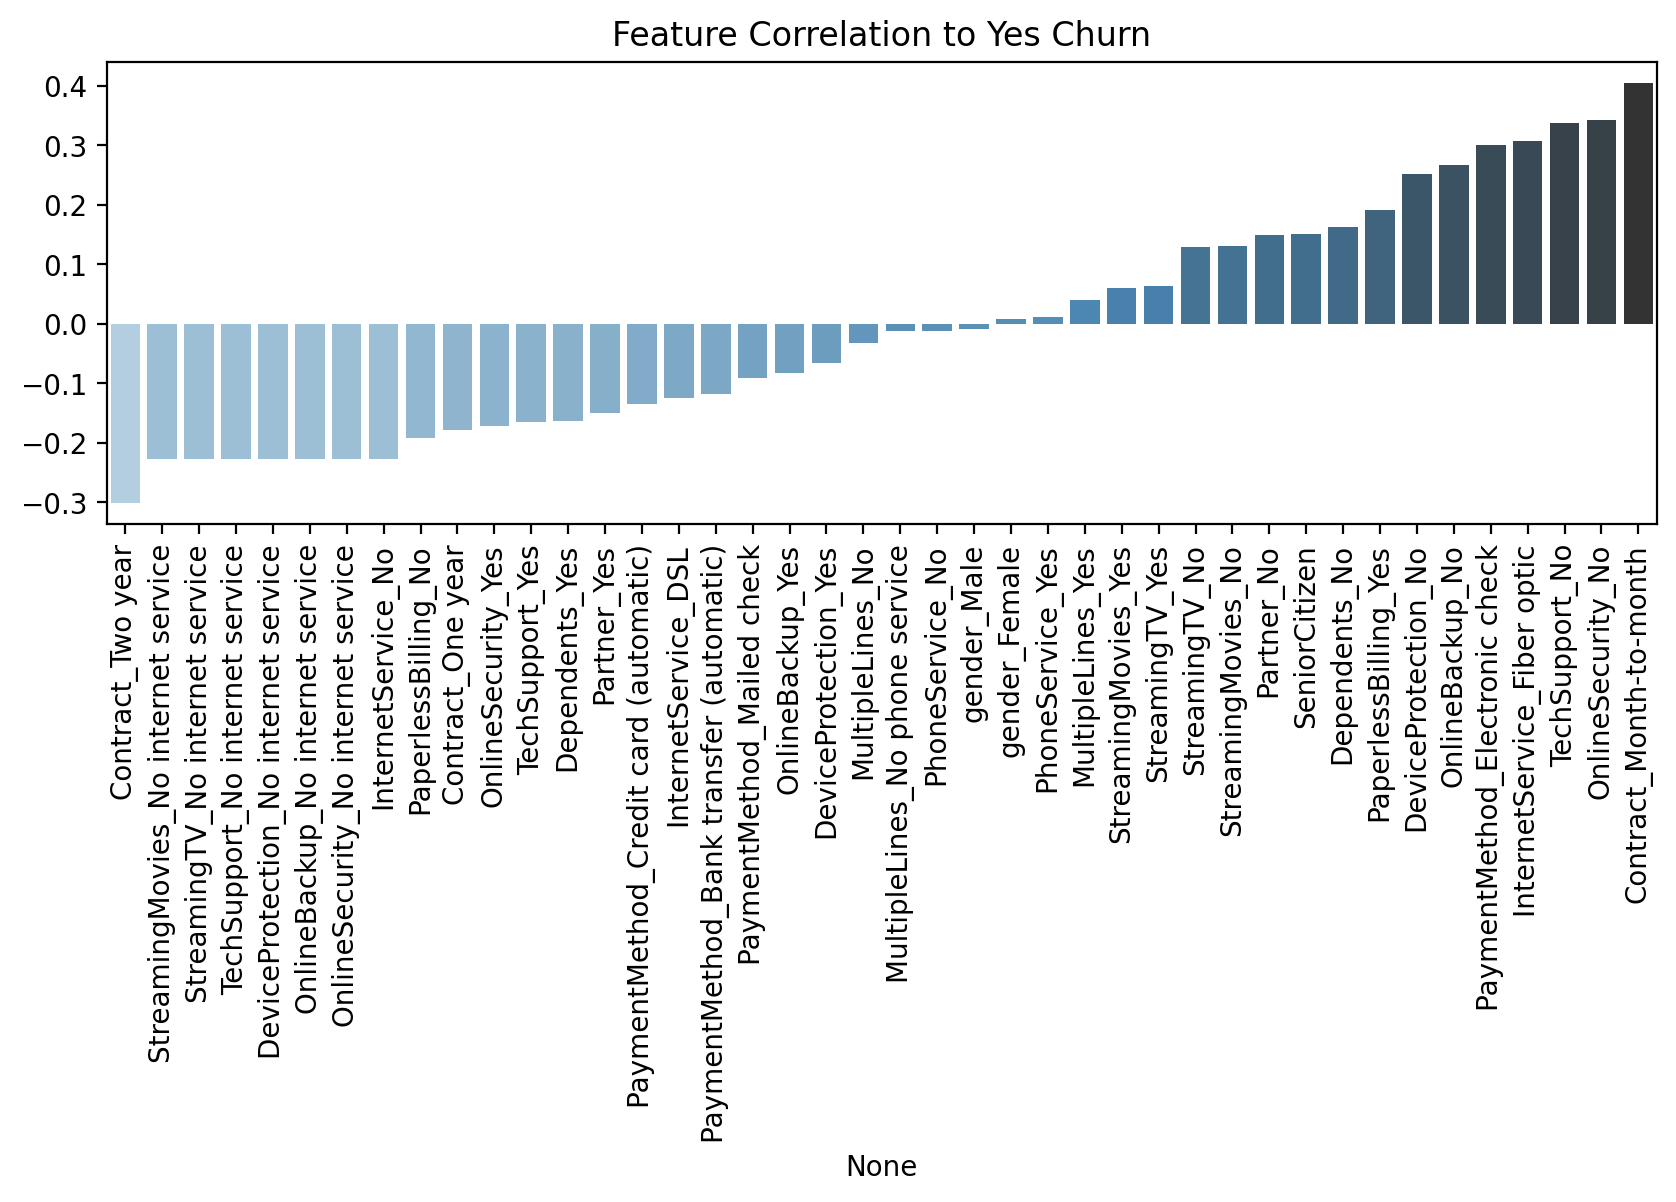

In [27]:
plt.figure(figsize=(10,3),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values, hue= corr_df['Churn_Yes'].sort_values().iloc[1:-1], palette='Blues_d', legend=False)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);



---
---

## Part 3: Churn Analysis

Segemented customers based on their tenure to create "cohorts"

The 3 contract types available: Month-to-month, One year, Two year

In [28]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

A histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

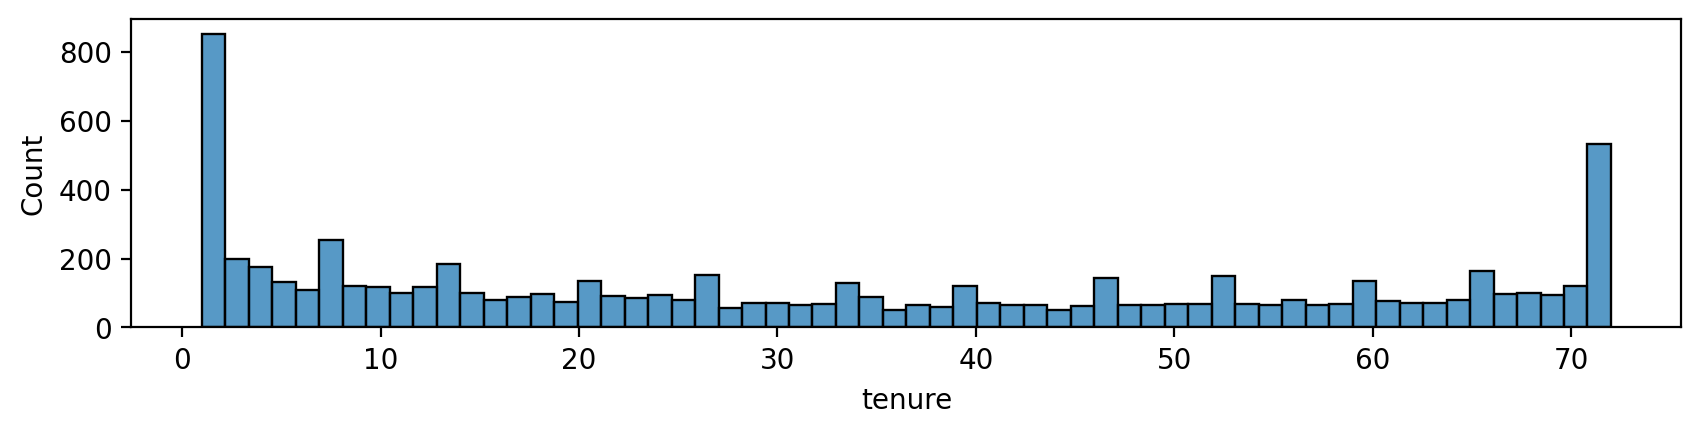

In [29]:
plt.figure(figsize=(10,2),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

Below are histograms separated by two additional features, Churn and Contract

<Figure size 2000x600 with 0 Axes>

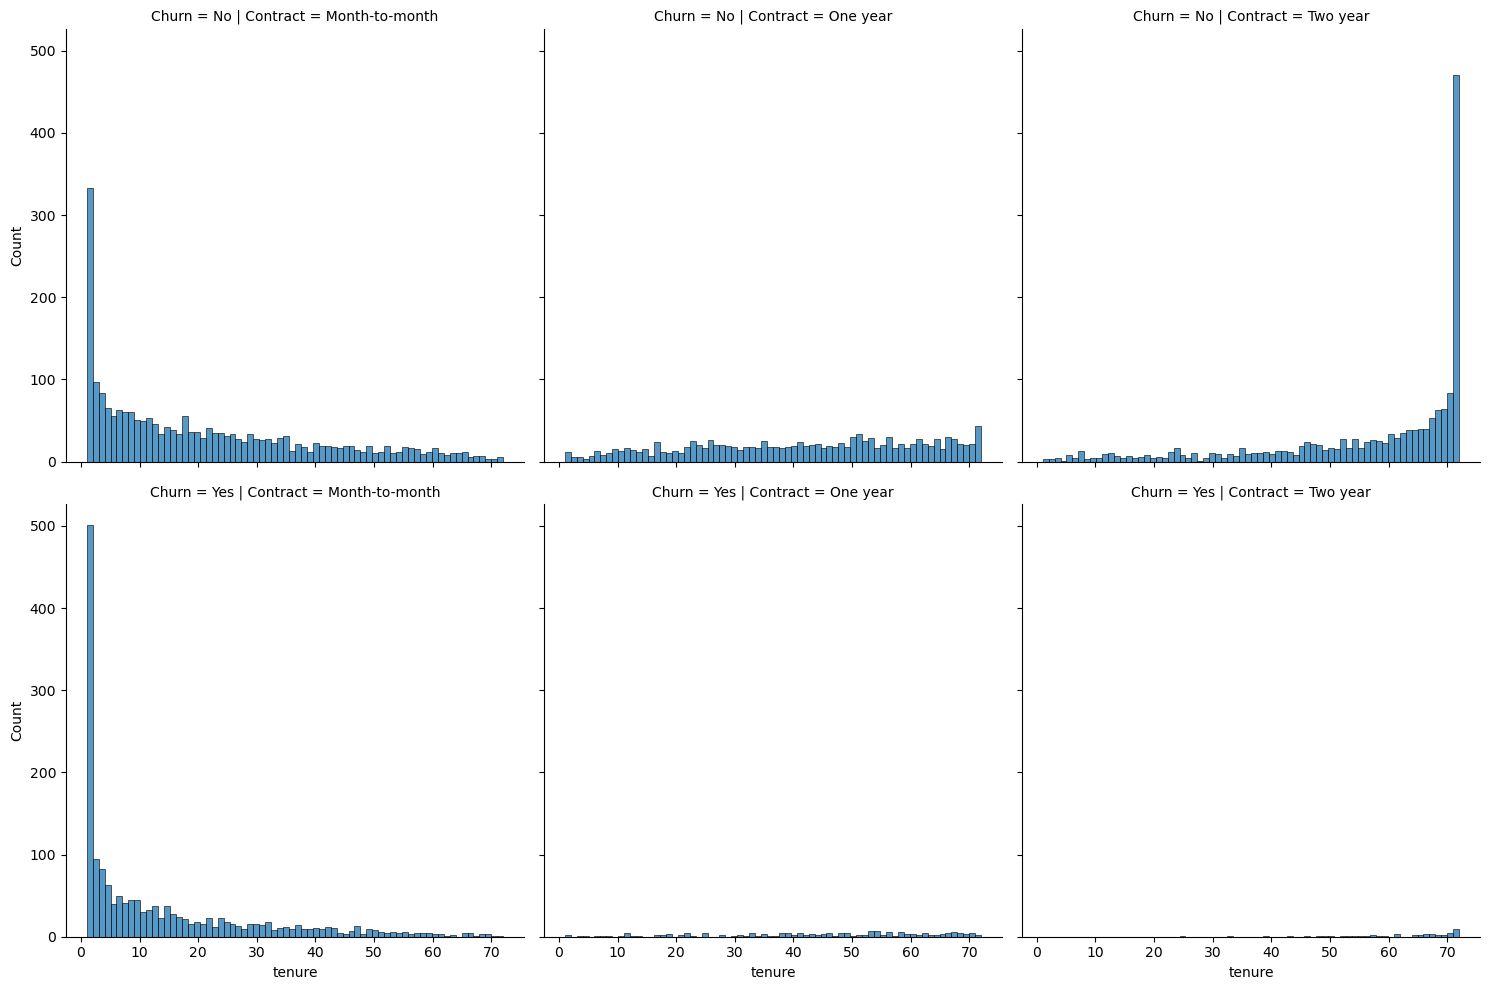

In [30]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

A scatter plot of Total Charges versus Monthly Charges, and color hue by Churn

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

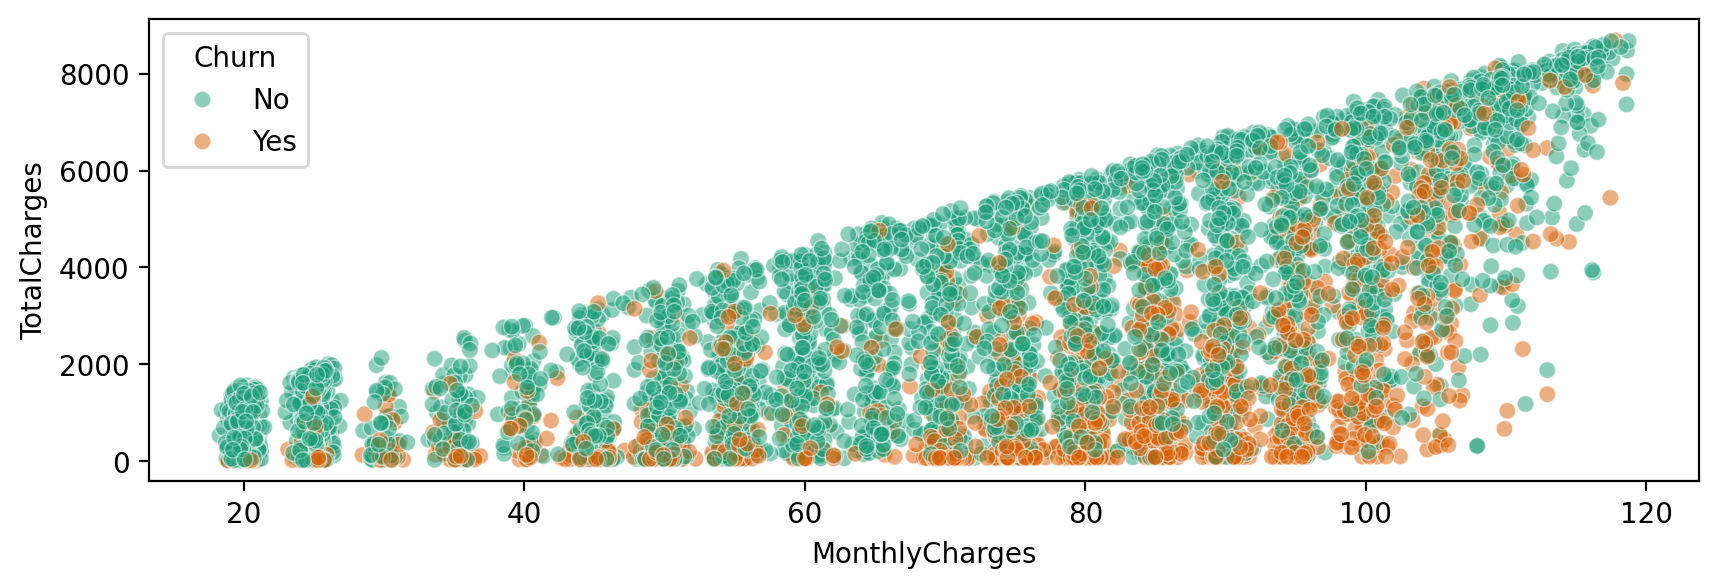

In [32]:
plt.figure(figsize=(10,3),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

### Creating Cohorts based on Tenure

I treated each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.

And then calculated the Churn rate (percentage that had Yes Churn) per cohort. 

For example, the cohort that has had a tenure of 1 month has a Churn rate of 61.99%. 

Based on cohorts 1-72 months, a general trend is: the longer the tenure of the cohort, the less of a churn rate. 

This makes sense as you are less likely to stop service the longer you've had it.

In [161]:
#CODE HERE

In [33]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [35]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [36]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Based on the Churn Rate per tenure group 1-72 months, I created a plot showing churn rate per months of tenure.

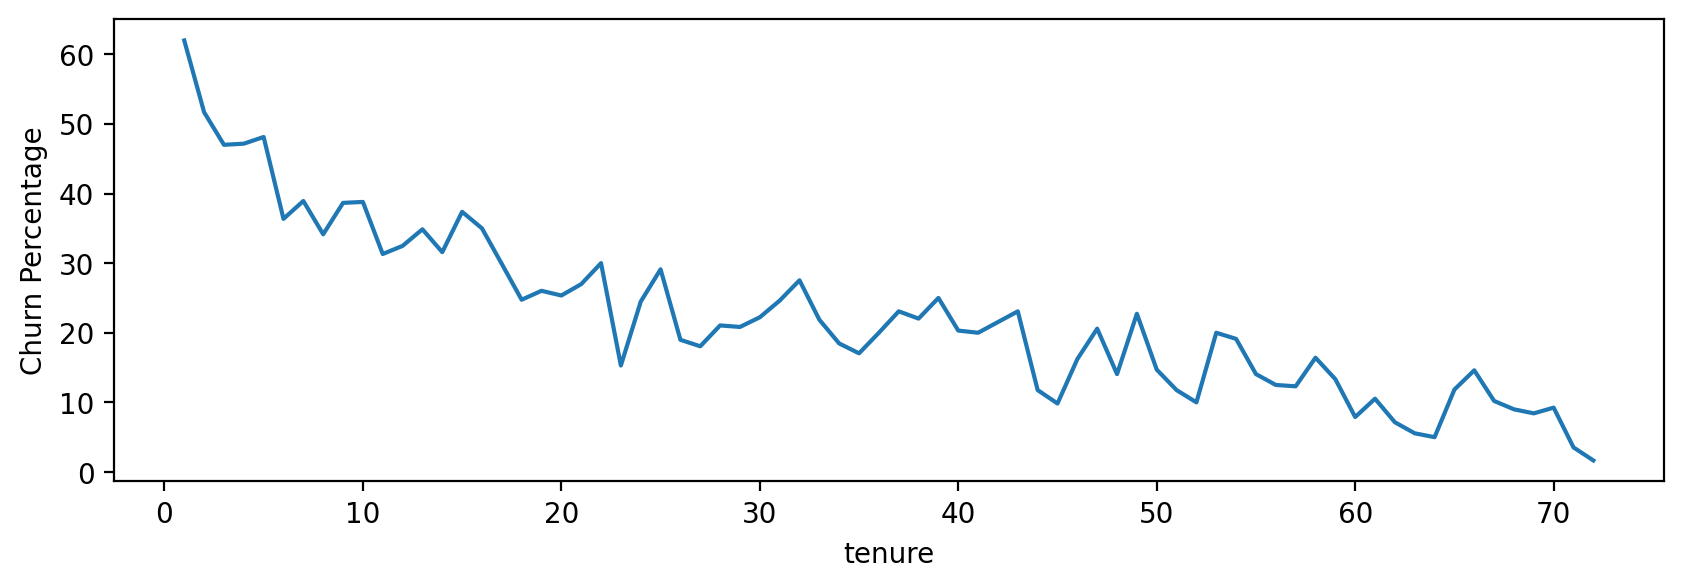

In [38]:
plt.figure(figsize=(10,3),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
Based on the tenure column values, I created a new column called Tenure Cohort that creates 4 separate categories:
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [39]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [40]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [41]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


Here is a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

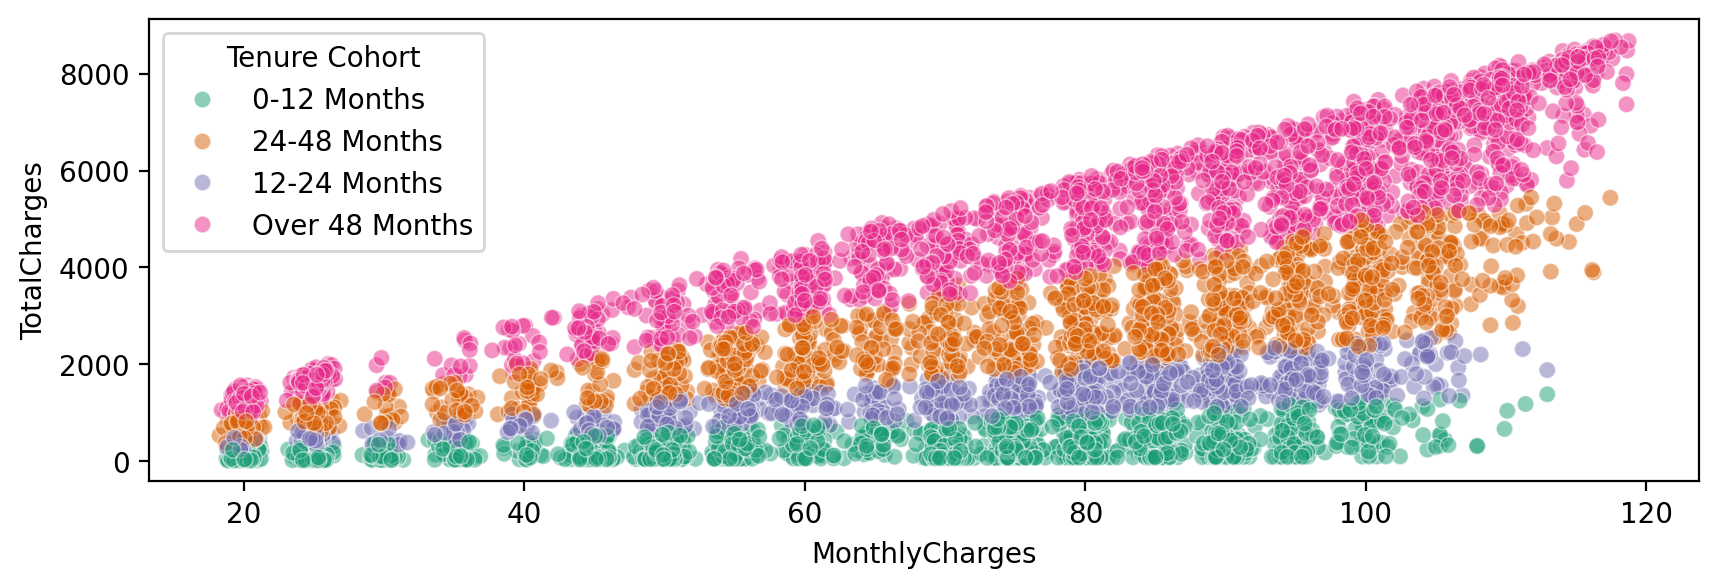

In [43]:
plt.figure(figsize=(10,3),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

Here is a count plot showing the churn count per cohort.

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

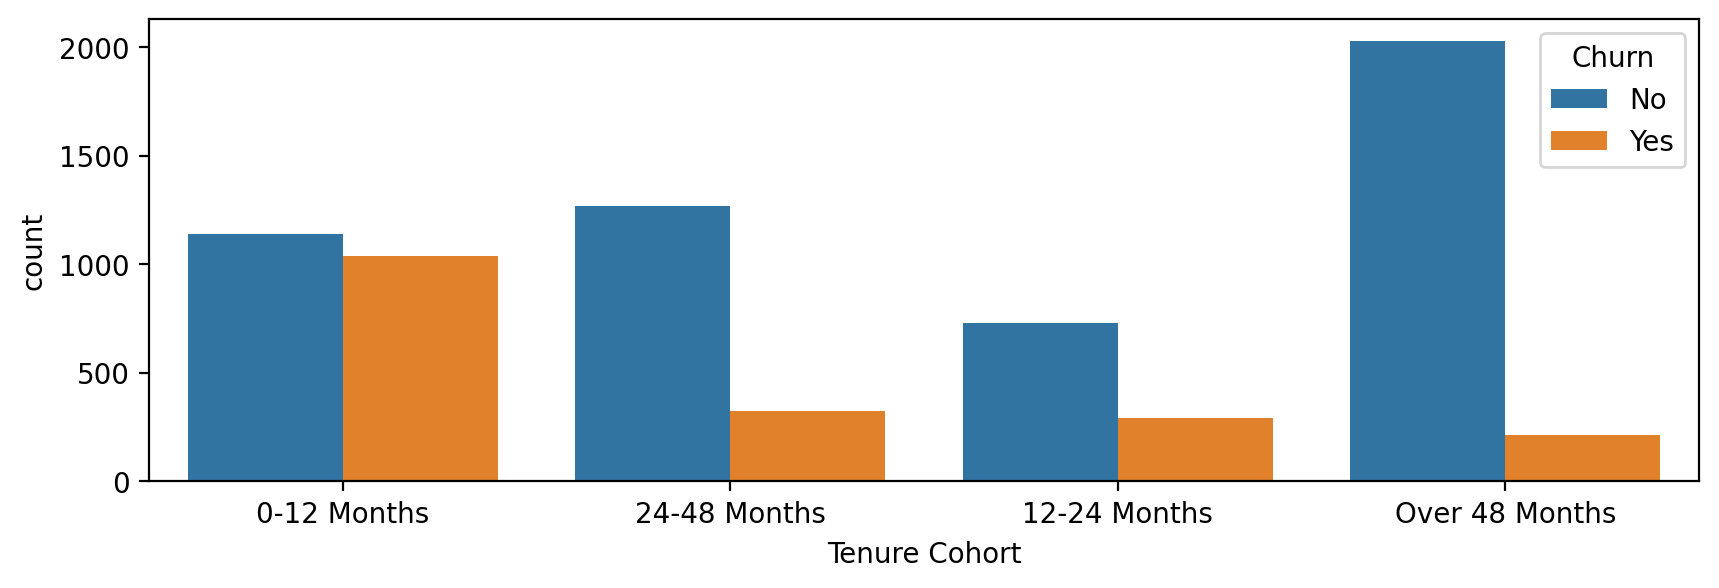

In [44]:
plt.figure(figsize=(10,3),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

Below is a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.

<Figure size 2000x600 with 0 Axes>

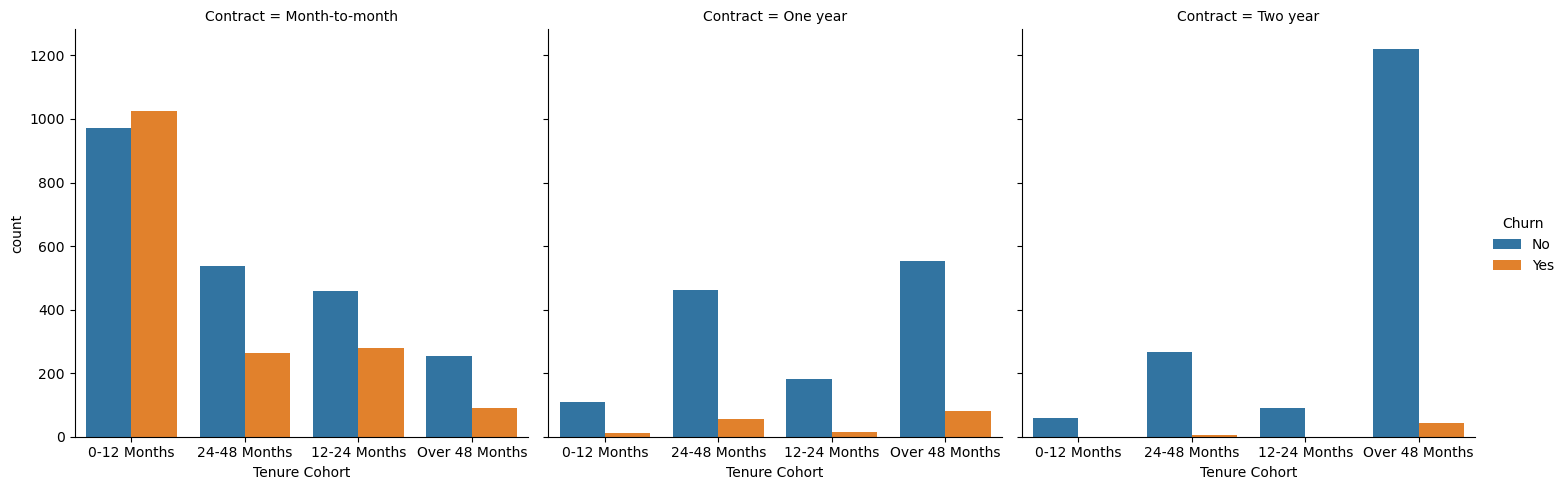

In [45]:
plt.figure(figsize=(10,3),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

---
---

## Part 4: Predictive Modeling

Here I have explored 4 different tree based methods: 
A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting

In [47]:
# drop unnecessary features 
X = df.drop(['Churn','customerID'],axis=1)

# create dummy variables for categorical columns
X = pd.get_dummies(X,drop_first=True)

In [48]:
y = df['Churn']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Single Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
dt_classifier = DecisionTreeClassifier()

In [59]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [61]:
# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy: 0.78


In [62]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [66]:
best_dt_model = grid_search.best_estimator_

In [67]:
preds = best_dt_model.predict(X_test)

In [68]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       557
         Yes       0.49      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



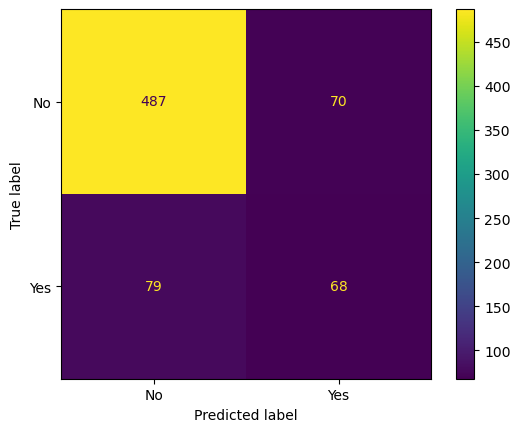

In [70]:
plot_confusion_matrix(best_dt_model,X_test,y_test)

In [72]:
imp_feats = pd.DataFrame(data=best_dt_model.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

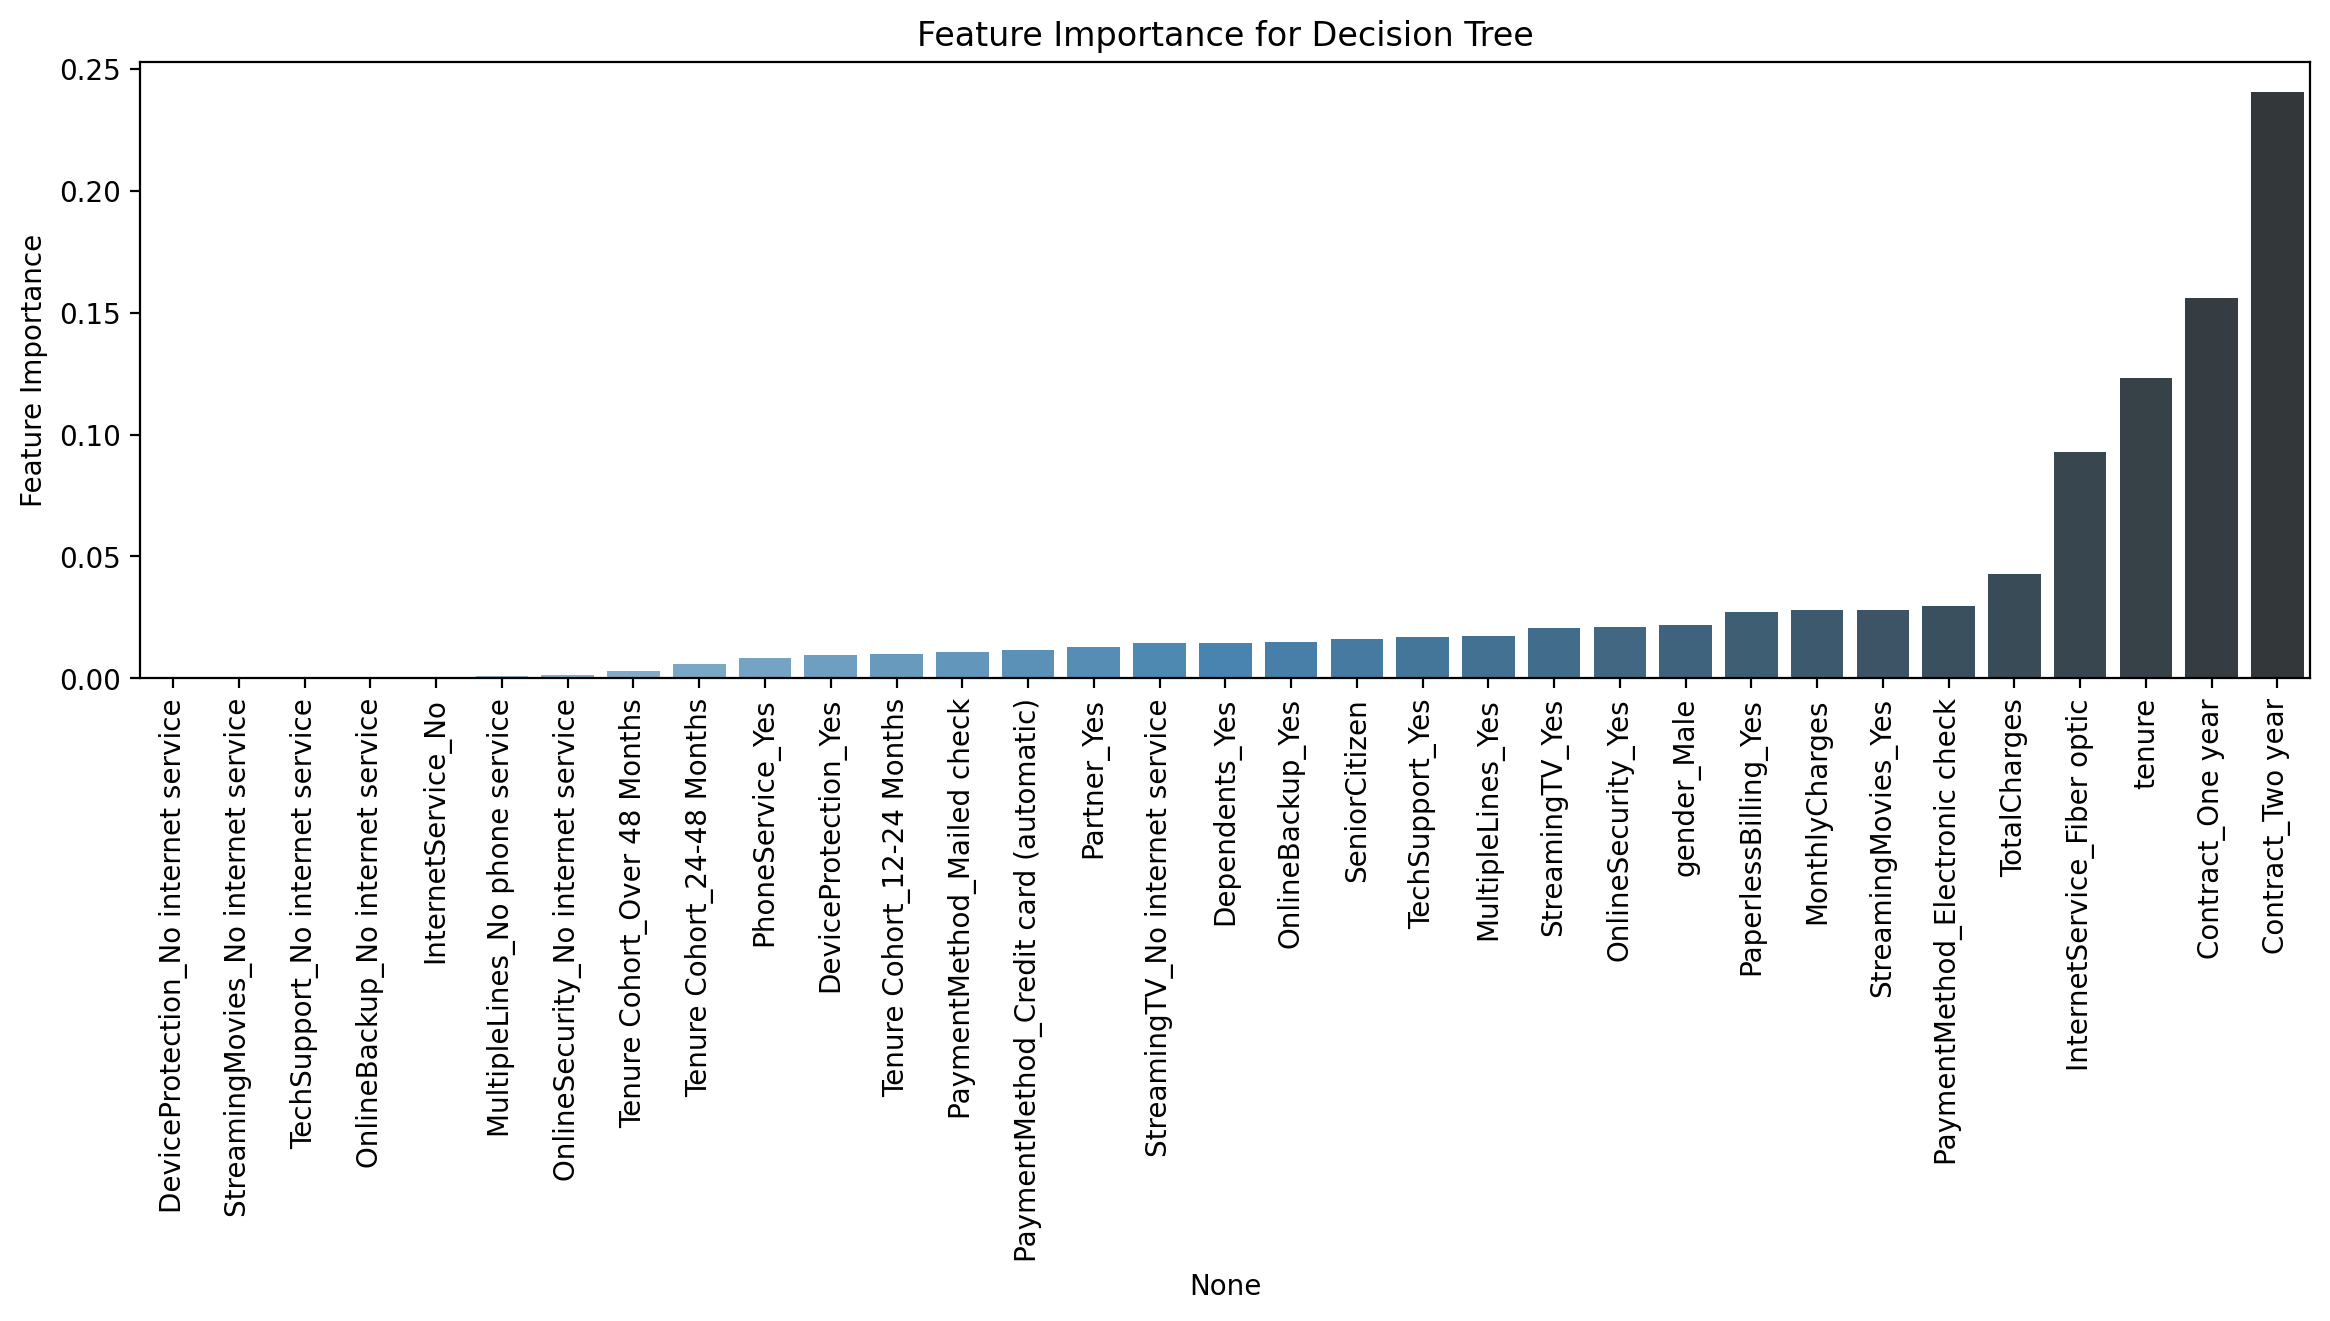

In [79]:
plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance', hue= imp_feats.sort_values('Feature Importance').index, palette='Blues_d', legend=False)
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

### Random Forest

with **RandomizedSearchCV**:

Instead of GridSearchCV, I used RandomizedSearchCV, which randomly samples a fixed number of hyperparameter combinations from the specified search space.

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [95]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [98]:
# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [10, 30, 50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [99]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Best Accuracy: 0.80


In [100]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [101]:
best_rf_model = random_search.best_estimator_

In [102]:
preds = best_rf_model.predict(X_test)

test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy with Best Parameters: {:.2f}".format(test_accuracy))

Test Accuracy with Best Parameters: 0.83


In [103]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



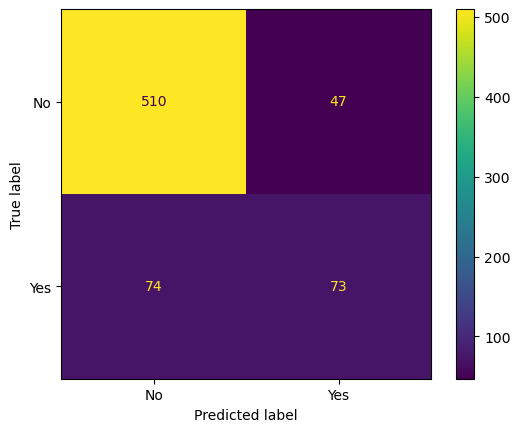

In [123]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plot_confusion_matrix(best_rf_model,X_test,y_test)

### Boosted Trees

**AdaBoost and Gradient Boosting**

### AdaBoost 

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
# Define the AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()

In [107]:
# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [30, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

In [108]:
# Create the GridSearchCV object
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))


Best Parameters:  {'learning_rate': 1, 'n_estimators': 30}
Best Accuracy: 0.80


In [109]:
best_adaboost_model = grid_search.best_estimator_

In [110]:
preds = best_adaboost_model.predict(X_test)

test_accuracy = best_adaboost_model.score(X_test, y_test)
print("Test Accuracy with Best Parameters: {:.2f}".format(test_accuracy))

Test Accuracy with Best Parameters: 0.83


In [111]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.73       704
weighted avg       0.82      0.83      0.82       704



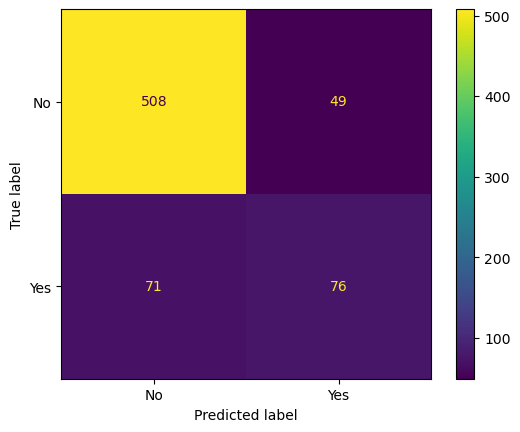

In [124]:
plot_confusion_matrix(best_adaboost_model,X_test,y_test)

### Gradient Boost 

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
# Define the GradientBoostingClassifier
gradientboost_classifier = GradientBoostingClassifier()

In [115]:
# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [30, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

In [117]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(gradientboost_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

Best Parameters:  {'subsample': 1.0, 'n_estimators': 30, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best Accuracy: 0.80


In [119]:
best_gradientboost_model = random_search.best_estimator_

In [120]:
preds = best_gradientboost_model.predict(X_test)

test_accuracy = best_gradientboost_model.score(X_test, y_test)

print("Test Accuracy with Best Parameters: {:.2f}".format(test_accuracy))

Test Accuracy with Best Parameters: 0.82


In [121]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



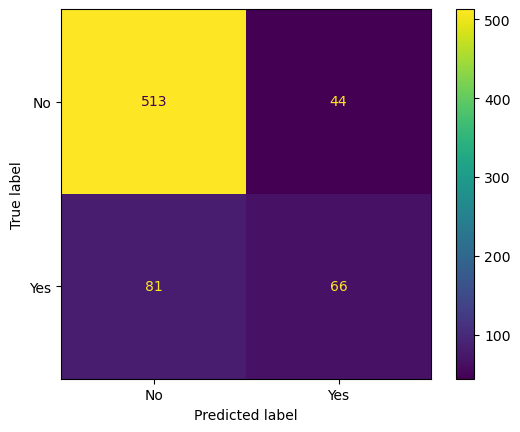

In [125]:
plot_confusion_matrix(best_gradientboost_model,X_test,y_test)

With base models, we got best performance from Random Forest and AdaBoostClassifier with accuracies of 83%. Yet note, most models performed about the same on the data set with accuracy ranging from 78 to 83. 